## Assignment 4
Author: Aryan Laxman Sirohi

This jupyter notebook contains a demonstration on the following 3 Interpretable ML models:

* OneR Rule List
* FIGS (Fast Interpretable Greedy-Tree Sums)
* Rule Fit Classifier

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laxman-22/Interpretable-ML-XAI/blob/main/Assignment-4-XAI.ipynb)

Import Necessary Libraries

In [2]:
!pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 10.8 MB/s eta 0:00:00


In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imodels import OneRClassifier, FIGSClassifier, RuleFitClassifier, get_clean_dataset
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
np.random.seed(42)

## OneR Rule List

Below is a OneR Rule List model which works by creating rules based on only one feature that best classifies the target variable.

In this case, the model identified that SITE is the best feature to use, and 3 rules are created in order to build this model making it highly interpretable.

In [52]:
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("List of Features: ", feature_names)
oner_model = OneRClassifier()
oner_model.fit(X_train, y_train, feature_names=feature_names)
preds = oner_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)

print(oner_model)
print("Accuracy:", str(accuracy * 100) +"%")


List of Features:  ['SITE', 'LOC', 'ambulatory', 'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop', 'Clotheslining', 'AlteredMentalStatus2', 'FocalNeuroFindings2', 'PainNeck2', 'PosMidNeckTenderness2', 'TenderNeck2', 'Torticollis2', 'SubInjHead2', 'SubInjFace2', 'SubInjExt2', 'SubInjTorsoTrunk2', 'IsEms', 'Position_IDEMS', 'Position_L', 'Position_PA', 'Position_S', 'Position_W', 'PtCompPainHead2', 'PtCompPainFace2', 'PtCompPainExt2', 'PtCompPainTorsoTrunk2', 'PtTenderHead2', 'PtTenderFace2', 'PtTenderExt2', 'PtTenderTorsoTrunk2', 'AgeInYears', 'gender_F']
> ------------------------------
> Greedy Rule List
> ------------------------------
↓
15.14% risk (2484 pts)
	if ~SITE ==> 16.8% risk (1863 pts)
↓
14.19% risk (621 pts)
	if SITE ==> 17.9% risk (156 pts)
↓
14.11% risk (465 pts)
	if ~SITE ==> 14.299999999999999% risk (217 pts)

Accuracy: 83.95657418576599%


Below is a different way to understand the OneRClassifier model's output from above.

The number of points in the parenthesis represents the number of data points that fall in each part of the rule list.

During the training process, this algorithm iterates through all of the listed features above and finds only a single feature that can best predict the target variable.

Then when it creates the rule list, it calculates the risk of misclassification at each step which is the risk percentage in each cell.

The best model is chosen where the risk of misclassification is minimized.

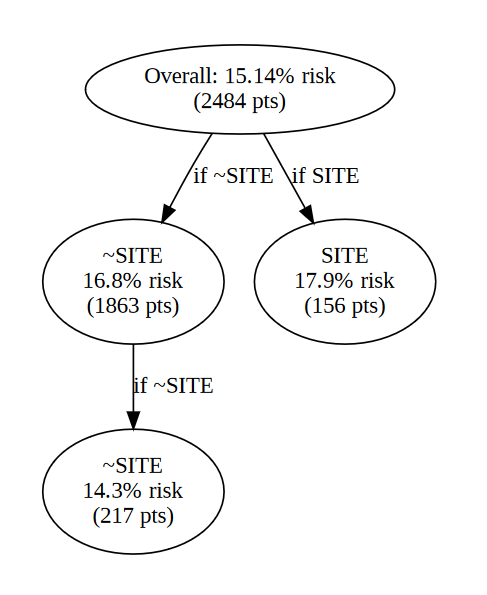

Now this is a very simply algorithm, however it was still able to get an 84% accuracy with only taking one of the many features into account which is quite good for such a simple model.

## FIGS (Fast Interpretable Greedy-Tree Sums)



This type of model is used to construct trees with the features to predict the target variable by iteratively building the tree and ensuring the best split can be made for that specific area rather than optimizing all splits across trees.

In [74]:
model_figs = FIGSClassifier(max_rules=3, max_trees=3)
model_figs.fit(X_train, y_train, feature_names=feature_names)
preds = model_figs.predict(X_test)
accuracy = accuracy_score(y_test, preds)

print(model_figs)
print("Accuracy:", str(accuracy * 100) +"%")


> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
FocalNeuroFindings2 <= 0.500 (Tree #0 root)
	Val: 0.117 (leaf)
	Val: 0.427 (leaf)

	+
HighriskDiving <= 0.500 (Tree #1 root)
	Val: -0.008 (leaf)
	Val: 0.550 (leaf)

	+
PainNeck2 <= 0.500 (Tree #2 root)
	Val: -0.037 (leaf)
	Val: 0.058 (leaf)

Accuracy: 84.68033775633293%


The model was able to be 85% accurate which is slightly better than the OneR but that is still a better model as it is able to achieve similar performance while being simpler as it only relies on a single feature rather than all the features.

Below is a visualization of the rules used to build the different trees and once the outputs from each tree is calculated and then summed together to determine the probability that the prediction belongs to the positive class.

For example, if an input is provided and the output needs to be predicted, all of the trees will be traversed until the last leaf node and the final output of each tree is summed together. If the final summation is at around 0.7 that means that the model believes that the model is pretty confident that the prediction should be class 1. If the value is less than 0.5 it is likely that the prediction belongs to the alternate class and 0.5 exactly means that the model thinks it could belong to either class.

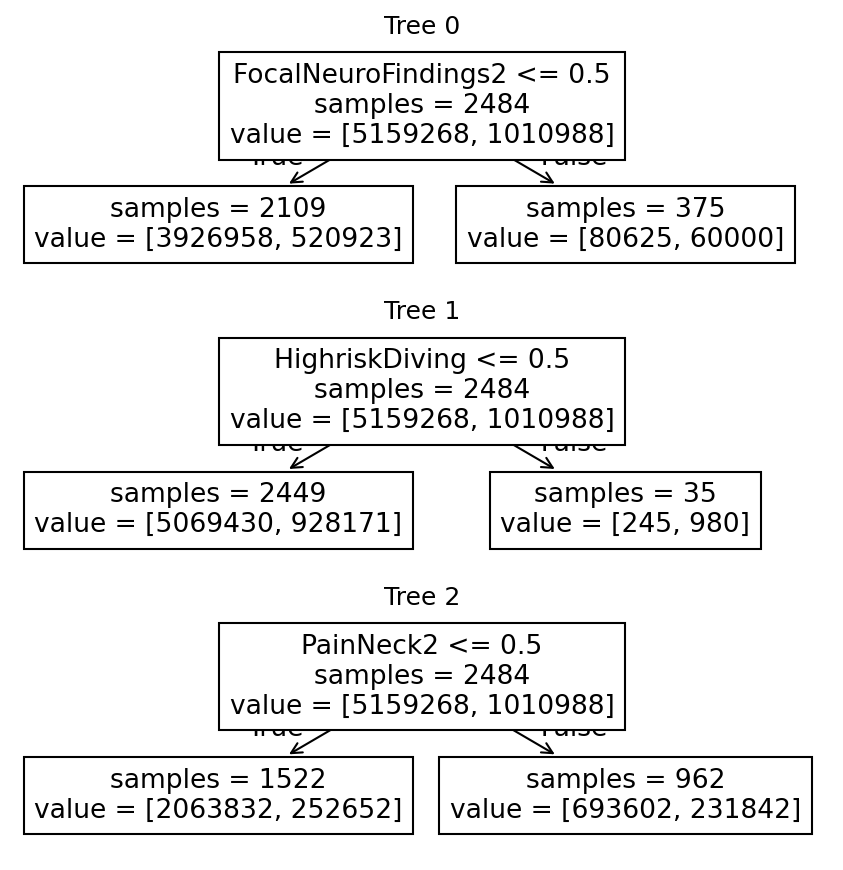

In [78]:
model_figs.plot(fig_size=7)

## Rule Fit Classifier

The Rule Fit Classifier is essentially a bunch of if-then statements that can classify the target variable, below is an example of a rule fit classifier that has generated the rules as evident in the table below. Each rule (e.g. X1, X2) has been generated by the model and then based on the conditions the coefficient is produced.

The prediction sums the coefficients together which results in a prediction. The process of prediction stops when a rule is not satisfied.

This model below was able to produce a model with an 84% accuracy which is on par with the OneR model. Therefore, it is clear that the OneR model is the simplest and most effective model of these three as it only depends on a single feature and provides reliable results.

In [94]:
rulefit = RuleFitClassifier()
rulefit.fit(X_train, y_train)
preds = rulefit.predict(X_test)
accuracy = accuracy_score(y_test, preds)

print("Accuracy:", str(accuracy * 100) +"%")
rulefit.visualize()

Accuracy: 84.31845597104946%


,rule,coef
1,X1,0.04
2,X2,-0.03
13,X13,0.12
15,X15,0.19
27,X27,-0.37
31,X31,-0.04
32,X32,-0.07
48,X22 <= 0.5 and X4 <= 0.5,-0.52
46,X3 <= 0.5 and X4 <= 0.5 and X8 <= 0.5,-0.48
47,X14 <= 0.5 and X18 <= 0.5 and X37 <= 15.92,-0.48
